In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Read the input
spectX = np.loadtxt("spectX.txt")
spectY = np.loadtxt("spectY.txt")

In [26]:
T = 267
n = 23
numIterations = 257
requiredIteration = [0,1,2,4,8,16,32,64,128,256]

# Get the Ti array for M-step to update pi
Ti = np.zeros(n)
for i in range(n):
    Ti[i] = np.sum(spectX[:,i])

In [27]:
# P(Y|X)
# given arrays x and p, and y = 0 or 1
def likelihood(p, x, y):
    prod = np.prod((1-p)**x)
    ret = (1-y)*prod + y*(1-prod)
    return ret

# E-step of EM algorithm
# given arrays x and p, and y = 0 or 1
def eStep(p, x, y):
    numer = y*x*p
    denom = 1-np.prod((1-p)**x)
    return numer/denom

In [37]:
def EM(xData, yData):
    mistakes = []  # mistakes in each iteration
    L = []         # log-likelihood in each iteration
    params = np.full(n, 0.05) # initialize each pi with 0.05
    
    for i in range(numIterations):
        logLikelihood = 0
        numMistakes = 0
        eStepSum = 0
        
        for t in range(T):
            p_yx = likelihood(params, xData[t], yData[t])
            logLikelihood += np.log(p_yx)
            eStepSum += eStep(params, xData[t], yData[t])
            
            if p_yx <= 0.5:
                numMistakes += 1

        # Update pi
        params = eStepSum/Ti
            
        mistakes.append(numMistakes)
        L.append(logLikelihood/T)
        
        if i in requiredIteration:
            print('iteration: %d \t number of mistakes M %d \t log-likelihood L %.5f' % (i, numMistakes, logLikelihood/T))
    return mistakes, L

In [38]:
mistakes_list, log_likelihoods = EM(spectX, spectY)

iteration: 0 	 number of mistakes M 175 	 log-likelihood L -0.95809
iteration: 1 	 number of mistakes M 56 	 log-likelihood L -0.49592
iteration: 2 	 number of mistakes M 43 	 log-likelihood L -0.40822
iteration: 4 	 number of mistakes M 42 	 log-likelihood L -0.36461
iteration: 8 	 number of mistakes M 44 	 log-likelihood L -0.34750
iteration: 16 	 number of mistakes M 40 	 log-likelihood L -0.33462
iteration: 32 	 number of mistakes M 37 	 log-likelihood L -0.32258
iteration: 64 	 number of mistakes M 37 	 log-likelihood L -0.31483
iteration: 128 	 number of mistakes M 36 	 log-likelihood L -0.31116
iteration: 256 	 number of mistakes M 36 	 log-likelihood L -0.31016


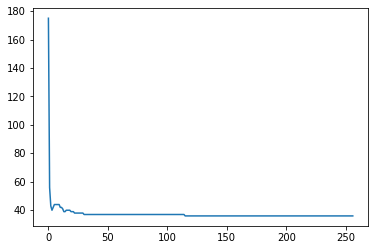

In [40]:
plt.plot(mistakes_list)

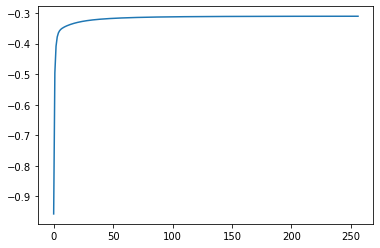

In [41]:
plt.plot(log_likelihoods)